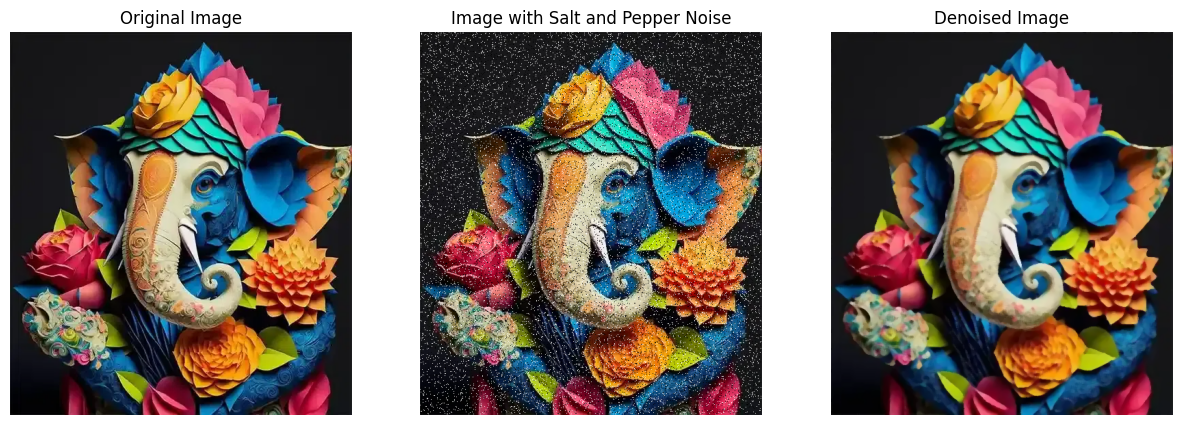

True

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to add salt-and-pepper noise to a color image
def add_salt_and_pepper_noise(image, amount=0.02):
    row, col, _ = image.shape  # Get the dimensions of the image (height, width, channels)

    # Salt noise
    num_salt = int(amount * row * col)
    salt_coords = [np.random.randint(0, i-1, num_salt) for i in image.shape[:2]]
    image[salt_coords[0], salt_coords[1], :] = 255  # Set white (salt) pixels in all channels

    # Pepper noise
    num_pepper = int(amount * row * col)
    pepper_coords = [np.random.randint(0, i-1, num_pepper) for i in image.shape[:2]]
    image[pepper_coords[0], pepper_coords[1], :] = 0  # Set black (pepper) pixels in all channels

    return image

# Load the original image
image = cv2.imread('/abc.jpeg', cv2.IMREAD_COLOR)

# Add salt and pepper noise
noisy_image = add_salt_and_pepper_noise(image.copy(), amount=0.05)  # Adjust noise amount

# Apply Median Blur to remove salt-and-pepper noise
denoised_image = cv2.medianBlur(noisy_image, 5)  # Kernel size of 5

# Display the images: original, noisy, and denoised
plt.figure(figsize=(15, 5))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct color display
plt.title("Original Image")
plt.axis('off')

# Noisy Image
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct color display
plt.title("Image with Salt and Pepper Noise")
plt.axis('off')

# Denoised Image
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB for correct color display
plt.title("Denoised Image")
plt.axis('off')

plt.show()

# Save the denoised image
cv2.imwrite('denoised_image_color.jpg', denoised_image)
